In [1]:
'''Import packages for loading data, analysing, and plotting'''

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma


import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
# define filenames and their directories

directory = 'C:\\Users\\sophi\\Not for OneDrive\\Dissertation_NFOD\\Modelling data\\models with AMOC'
filename_a1 = '%s/CESM2_lig127k.cvdp_data.1-700.nc'%directory

# load files via xarray

expt_a1_file = xr.open_dataset(filename_a1,decode_times=False)

time_a1 = expt_a1_file['time']
amoc_timeseries_ann_a1 = expt_a1_file['amoc_timeseries_ann']

C:\Users\sophi\anaconda3\lib\site-packages\xarray\conventions.py:494: SerializationWarning: variable 'nino34_autocorrelation' has multiple fill values {-1073741800.0, 1e+30}, decoding all values to NaN.
  use_cftime=use_cftime,


In [3]:
time_a1_1 = time_a1[1:701]

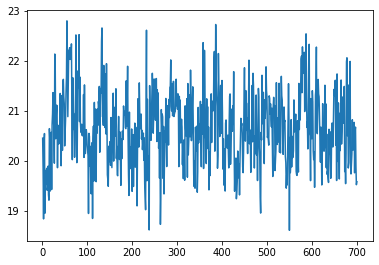

In [4]:
a = plt.figure()
axes = a.add_axes([0.1, 0.1, 0.8, 0.8])
y = amoc_timeseries_ann_a1
x = time_a1_1
axes.plot(x,y)

In [5]:
fourier = np.fft.fft(amoc_timeseries_ann_a1)
n = amoc_timeseries_ann_a1.size
timestep = 1
freq = np.fft.fftfreq(n, d = timestep)

C:\Users\sophi\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 100)

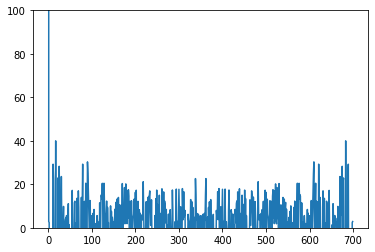

In [9]:
plt.plot(fourier)
ax = plt.gca()
ax.set_ylim([0,100])

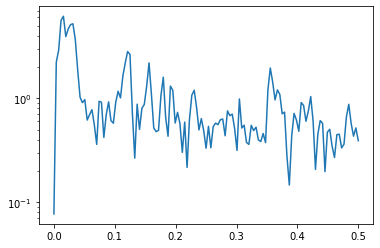

In [18]:
from scipy import signal
f, Pxx_den = scipy.signal.welch(amoc_timeseries_ann_a1)
plt.semilogy(f, Pxx_den)

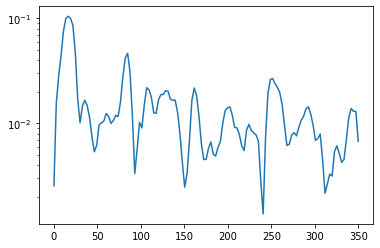

In [31]:
fs = 700
f, Pxx_den = scipy.signal.welch(amoc_timeseries_ann_a1, fs, 'flattop', scaling = 'spectrum')
plt.semilogy(f, Pxx_den)